In [3]:
import pandas as pd

# Ler os dois arquivos
df_2020 = pd.read_csv('/content/ENEM_2020.csv')
df_2021 = pd.read_csv('/content/ENEM_2021.csv')

# Concatenar as duas bases
df = pd.concat([df_2020, df_2021], ignore_index=True)

# Visualizar os primeiros registros
df.head()

,id_inscricao,ano,sexo,tipo_escola,nota_ciencias_natureza,nota_ciencias_humanas,nota_linguagens_codigos,nota_matematica,renda_familiar
0,200003582964,2020,F,1.0,387.1,416.2,462.4,432.7,A
1,200001439599,2020,F,1.0,394.7,446.7,491.0,527.4,A
2,200004870445,2020,M,1.0,466.1,372.9,357.3,331.5,A
3,200005795813,2020,F,1.0,452.6,358.4,441.2,433.4,A
4,200006344901,2020,F,1.0,419.8,376.8,445.6,385.4,A


In [5]:
#Iniciar analize explanatória
df['renda_familiar'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

In [6]:
# Verificar os valores únicos de tipo de escola
print(df['tipo_escola'].unique())

[ 1.  2. nan  3.]


In [7]:
# Traduzir tipo de escola
df['tipo_escola'] = df['tipo_escola'].map({
    1: 'Pública',
    2: 'Privada'
})

# Remover registros onde tipo_escola ficou NaN após o mapeamento (ou seja, eram 3 ou já eram NaN)
df = df.dropna(subset=['tipo_escola'])

# Conferir resultado
print(df['tipo_escola'].value_counts())

tipo_escola
Pública    10448
Privada     4414
Name: count, dtype: int64


In [8]:
# Criar o dicionário de tradução da renda
faixas_renda = {
    'A': 'Até R$1.100',
    'B': 'R$1.100 a R$1.320',
    'C': 'R$1.320 a R$1.650',
    'D': 'R$1.650 a R$2.200',
    'E': 'R$2.200 a R$2.750',
    'F': 'R$2.750 a R$3.300',
    'G': 'R$3.300 a R$4.400',
    'H': 'R$4.400 a R$5.500',
    'I': 'R$5.500 a R$6.600',
    'J': 'R$6.600 a R$7.700',
    'K': 'R$7.700 a R$8.800',
    'L': 'R$8.800 a R$9.900',
    'M': 'R$9.900 a R$11.000',
    'N': 'Acima de R$11.000'
}

# Aplicar o mapeamento
df['renda_familiar'] = df['renda_familiar'].map(faixas_renda)

# Remover registros sem renda informada
df = df.dropna(subset=['renda_familiar'])

# Conferir resultado
print(df['renda_familiar'].value_counts())

renda_familiar
R$1.100 a R$1.320     4146
R$1.320 a R$1.650     2456
R$1.650 a R$2.200     1950
R$2.750 a R$3.300     1111
R$2.200 a R$2.750      947
R$3.300 a R$4.400      908
Até R$1.100            889
R$4.400 a R$5.500      652
R$5.500 a R$6.600      402
R$6.600 a R$7.700      258
R$9.900 a R$11.000     210
R$7.700 a R$8.800      186
R$8.800 a R$9.900      170
Acima de R$11.000      146
Name: count, dtype: int64


In [9]:
# Distribuição de tipo de escola
print("Distribuição Tipo de Escola:")
print(df['tipo_escola'].value_counts())

print("\nDistribuição de Renda Familiar:")
print(df['renda_familiar'].value_counts())

Distribuição Tipo de Escola:
tipo_escola
Pública    10055
Privada     4376
Name: count, dtype: int64

Distribuição de Renda Familiar:
renda_familiar
R$1.100 a R$1.320     4146
R$1.320 a R$1.650     2456
R$1.650 a R$2.200     1950
R$2.750 a R$3.300     1111
R$2.200 a R$2.750      947
R$3.300 a R$4.400      908
Até R$1.100            889
R$4.400 a R$5.500      652
R$5.500 a R$6.600      402
R$6.600 a R$7.700      258
R$9.900 a R$11.000     210
R$7.700 a R$8.800      186
R$8.800 a R$9.900      170
Acima de R$11.000      146
Name: count, dtype: int64


In [10]:
# Comparar médias de notas por tipo de escola
df.groupby('tipo_escola')[['nota_ciencias_natureza', 'nota_ciencias_humanas', 'nota_linguagens_codigos', 'nota_matematica']].mean()

,nota_ciencias_natureza,nota_ciencias_humanas,nota_linguagens_codigos,nota_matematica
tipo_escola,,,,
Privada,469.710763,496.093236,495.013711,502.716819
Pública,492.188722,520.539841,513.387539,528.114948


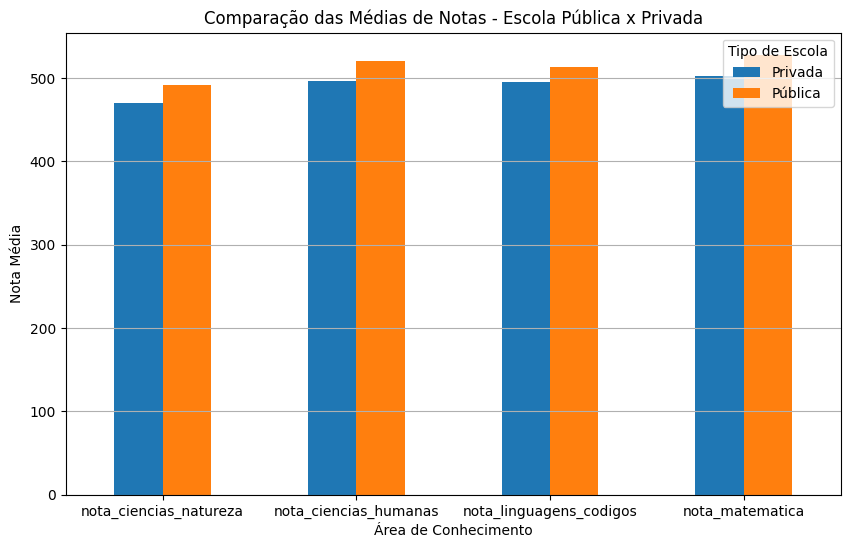

In [11]:
import matplotlib.pyplot as plt

# Definir as áreas de conhecimento
areas = ['nota_ciencias_natureza', 'nota_ciencias_humanas', 'nota_linguagens_codigos', 'nota_matematica']

# Calcular a média para cada tipo de escola
medias_escolas = df.groupby('tipo_escola')[areas].mean()

# Plotar o gráfico
medias_escolas.T.plot(kind='bar', figsize=(10,6))

# Configurações do gráfico
plt.title('Comparação das Médias de Notas - Escola Pública x Privada')
plt.ylabel('Nota Média')
plt.xlabel('Área de Conhecimento')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Escola')
plt.grid(axis='y')

# Exibir o gráfico
plt.show()

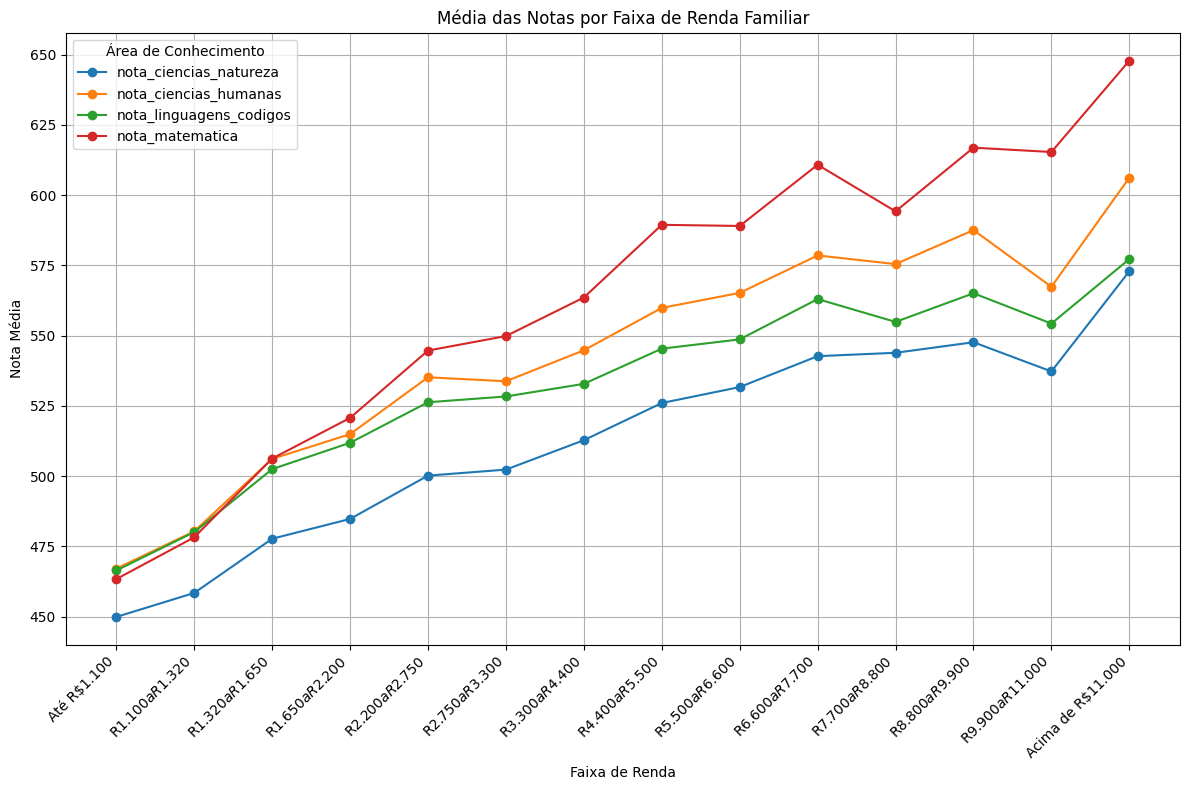

In [12]:
import matplotlib.pyplot as plt

# Definir as áreas de conhecimento
areas = ['nota_ciencias_natureza', 'nota_ciencias_humanas', 'nota_linguagens_codigos', 'nota_matematica']

# Calcular a média das notas por faixa de renda
medias_renda = df.groupby('renda_familiar')[areas].mean()

# Reordenar faixas de renda manualmente para ficarem na ordem correta
ordem_renda = [
    'Até R$1.100',
    'R$1.100 a R$1.320',
    'R$1.320 a R$1.650',
    'R$1.650 a R$2.200',
    'R$2.200 a R$2.750',
    'R$2.750 a R$3.300',
    'R$3.300 a R$4.400',
    'R$4.400 a R$5.500',
    'R$5.500 a R$6.600',
    'R$6.600 a R$7.700',
    'R$7.700 a R$8.800',
    'R$8.800 a R$9.900',
    'R$9.900 a R$11.000',
    'Acima de R$11.000'
]

medias_renda = medias_renda.reindex(ordem_renda)

# Plotar o gráfico
plt.figure(figsize=(12,8))

for area in areas:
    plt.plot(medias_renda.index, medias_renda[area], marker='o', label=area)

# Configurações do gráfico
plt.title('Média das Notas por Faixa de Renda Familiar')
plt.ylabel('Nota Média')
plt.xlabel('Faixa de Renda')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Área de Conhecimento')
plt.tight_layout()

# Exibir
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Primeiro, transformar a renda em uma ordem numérica
ordem_renda = [
    'Até R$1.100',
    'R$1.100 a R$1.320',
    'R$1.320 a R$1.650',
    'R$1.650 a R$2.200',
    'R$2.200 a R$2.750',
    'R$2.750 a R$3.300',
    'R$3.300 a R$4.400',
    'R$4.400 a R$5.500',
    'R$5.500 a R$6.600',
    'R$6.600 a R$7.700',
    'R$7.700 a R$8.800',
    'R$8.800 a R$9.900',
    'R$9.900 a R$11.000',
    'Acima de R$11.000'
]

# Mapeia a renda para números (0, 1, 2, 3, ...)
renda_mapping = {faixa: idx for idx, faixa in enumerate(ordem_renda)}
df['renda_familiar_num'] = df['renda_familiar'].map(renda_mapping)

# Agora definimos os dados de entrada (X) e o que queremos prever (y)
X = df[['nota_ciencias_natureza', 'nota_ciencias_humanas', 'nota_linguagens_codigos', 'nota_matematica', 'renda_familiar_num']]
y = df['tipo_escola']

# Transformar o target (Pública/Privada) em números
le = LabelEncoder()
y = le.fit_transform(y)  # Pública = 0, Privada = 1

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Acurácia: 0.5739030023094688


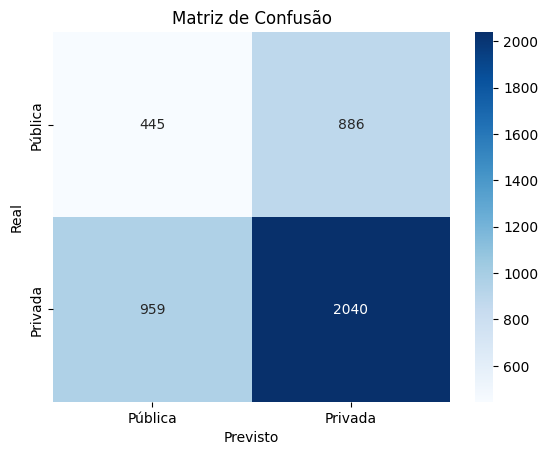


Relatório de Classificação:

              precision    recall  f1-score   support

     Pública       0.32      0.33      0.33      1331
     Privada       0.70      0.68      0.69      2999

    accuracy                           0.57      4330
   macro avg       0.51      0.51      0.51      4330
weighted avg       0.58      0.57      0.58      4330



In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Instanciar o modelo
modelo = DecisionTreeClassifier(random_state=42)

# Treinar (fit)
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))

# Mostrar matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pública', 'Privada'], yticklabels=['Pública', 'Privada'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Relatório completo
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=['Pública', 'Privada']))